In [13]:
#single image plot test
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import regionprops
from cellpose import models, plot
import pandas as pd
import seaborn as sns
import os

In [76]:

# INITIALIZATION (MUST BE RUN BEFORE THE FUNCTION IS CALLED)

# Load model (if not already)
model = models.CellposeModel(gpu=True)
rows = []
primary_id = 1
                    
def run_cell_analysis(ch2_path):
    """
    Performs Cellpose segmentation and feature extraction for a single image pair.
    The data is appended to the global 'rows' list.
    """
    print(f"/n--- Analyzing file: {os.path.basename(ch2_path)} ---")

    global rows
    rows = [] 
    global primary_id
    primary_id = 1

    # Assume ch2_path is the full path string (e.g., '.../HM_W001_P00001_CH2.tif')
    ch4_path = ch2_path.replace("_CH2.tif", "_CH4.tif")
    # 1. Load Images (as 2D grayscale)
    ch1_img = io.imread(ch2_path, as_gray=True)
    ch4_img = io.imread(ch4_path, as_gray=True)

    # 2. Run Cellpose (on the ch1/GFP channel)
    masks, flows, styles = model.eval([ch1_img],
                                      diameter=30,
                                      flow_threshold=0.4,
                                      cellprob_threshold=0.0)
    masks = masks[0]  # Unpack from list

    # 3. Measure Properties for BOTH channels using the SAME masks
    # The redundant [:, :] slicing is removed for cleaner code.
    props = regionprops(masks, intensity_image=ch1_img)
    ch4_props = regionprops(masks, intensity_image=ch4_img)
    
    # Get File Name (for tracking)
    file_name = os.path.splitext(os.path.basename(ch2_path))[0]

    # 4. COMBINE DATA INTO ONE ROW PER CELL (The main fix)
    # The 'props' and 'ch4_props' lists are guaranteed to be in the same order 
    # and correspond to the same labels, so we use zip().
    for p_gfp, p_s647 in zip(props, ch4_props):
        rows.append({
            "file": file_name,
            "primary_id": primary_id,
            "cell_id": p_gfp.label,
            "area_px": p_gfp.area,
            "mean_gfp": p_gfp.mean_intensity,
            "mean_s647": p_s647.mean_intensity # Both intensities are now in one row
        })
    
    primary_id += 1
    

In [77]:
# --- Execute the function for both channels ---
# 1. Run analysis for CH2
# CH_basepath = "C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/"
# ch2_path = os.path.join(CH_basepath, filename + "_CH2.tif")
CH2 = "C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/S+B+_w1/W001/P00001/HM_W001_P00001_CH2.tif"
# CH4 = "C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/S+B+_w1/W001/P00001/HM_W001_P00001_CH4.tif"

run_cell_analysis(CH2)
df_Splus = pd.DataFrame(rows)

CH2 = "C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/B+_w1/W001/P00001/HM_W001_P00001_CH2.tif"
# CH4 = "C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/B+_w1/W001/P00001/HM_W001_P00001_CH4.tif"
run_cell_analysis(CH2)
df_Sminus = pd.DataFrame(rows)
# df_all = pd.DataFrame(rows)

print(f"df_Splus now has {len(df_Splus)} rows.")
print(f"df_Sminus now has {len(df_Sminus)} rows.")

/n--- Analyzing file: HM_W001_P00001_CH2.tif ---
/n--- Analyzing file: HM_W001_P00001_CH2.tif ---
df_Splus now has 172 rows.
df_Sminus now has 143 rows.


In [41]:
# Tina delete later#
# --- Execute the function for both channels ---
# 1. Run analysis for CH2
# CH_basepath = "C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/S+B+_w1/"

# all_filenames = ["FOV1","FOV2","FOV3"];
# df=[];
# for z=1:len(all_filenames)
#     rows = []
#     primary_id = 1
#     run_cell_analysis(strcat(CH_basepath+all_filenames(z)+"_CH2.tif"), strcat(CH_basepath+all_filenames(z)+"_CH4.tif");
#     df = [df; pd.DataFrame(rows)]
# end



In [78]:
df = pd.DataFrame(rows)
df

,file,primary_id,cell_id,area_px,mean_gfp,mean_s647
0,HM_W001_P00001_CH2,1,1,53.0,0.094963,0.012129
1,HM_W001_P00001_CH2,1,2,190.0,0.103286,0.015026
2,HM_W001_P00001_CH2,1,3,170.0,0.066886,0.011607
3,HM_W001_P00001_CH2,1,4,70.0,0.108132,0.017219
4,HM_W001_P00001_CH2,1,5,184.0,0.066234,0.014382
...,...,...,...,...,...,...
138,HM_W001_P00001_CH2,1,139,65.0,0.074971,0.010474
139,HM_W001_P00001_CH2,1,140,77.0,0.130328,0.017756
140,HM_W001_P00001_CH2,1,141,59.0,0.113599,0.017801
141,HM_W001_P00001_CH2,1,142,93.0,0.130832,0.008917


In [79]:
df_Splus

,file,primary_id,cell_id,area_px,mean_gfp,mean_s647
0,HM_W001_P00001_CH2,1,1,194.0,0.092726,0.020584
1,HM_W001_P00001_CH2,1,2,75.0,0.067257,0.015759
2,HM_W001_P00001_CH2,1,3,309.0,0.072253,0.012537
3,HM_W001_P00001_CH2,1,4,87.0,0.081166,0.016023
4,HM_W001_P00001_CH2,1,5,173.0,0.114247,0.023638
...,...,...,...,...,...,...
167,HM_W001_P00001_CH2,1,168,189.0,0.083289,0.027152
168,HM_W001_P00001_CH2,1,169,132.0,0.184695,0.018525
169,HM_W001_P00001_CH2,1,170,104.0,0.075667,0.016988
170,HM_W001_P00001_CH2,1,171,98.0,0.058371,0.014350


In [80]:
df_Sminus

,file,primary_id,cell_id,area_px,mean_gfp,mean_s647
0,HM_W001_P00001_CH2,1,1,53.0,0.094963,0.012129
1,HM_W001_P00001_CH2,1,2,190.0,0.103286,0.015026
2,HM_W001_P00001_CH2,1,3,170.0,0.066886,0.011607
3,HM_W001_P00001_CH2,1,4,70.0,0.108132,0.017219
4,HM_W001_P00001_CH2,1,5,184.0,0.066234,0.014382
...,...,...,...,...,...,...
138,HM_W001_P00001_CH2,1,139,65.0,0.074971,0.010474
139,HM_W001_P00001_CH2,1,140,77.0,0.130328,0.017756
140,HM_W001_P00001_CH2,1,141,59.0,0.113599,0.017801
141,HM_W001_P00001_CH2,1,142,93.0,0.130832,0.008917


In [81]:
#concat the S+ and S-
df_Splus['Condition'] = 'S+B+'
df_Sminus['Condition'] = 'S-B+'

# Combine the two DataFrames
df_combined = pd.concat([df_Splus, df_Sminus], ignore_index=True)
df_combined['ratio_s647_gfp'] = df_combined['mean_s647'] / (df_combined['mean_gfp'] + 1e-9)

<Axes: xlabel='Condition', ylabel='ratio_s647_gfp'>

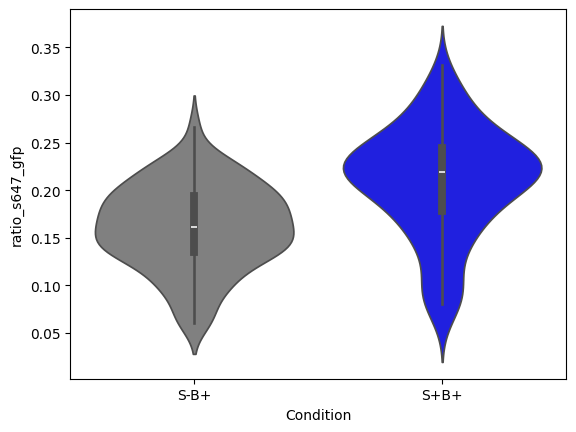

In [82]:
#violin plot 
sns.violinplot(
    data=df_combined,
    x='Condition',
    y='ratio_s647_gfp',
    hue='Condition',  # ADDED: Assign x to hue as recommended
    legend=False,     # ADDED: Hide the redundant legend
    palette=['blue', 'gray'],
    order=['S-B+', 'S+B+']
)

In [83]:
df_combined

,file,primary_id,cell_id,area_px,mean_gfp,mean_s647,Condition,ratio_s647_gfp
0,HM_W001_P00001_CH2,1,1,194.0,0.092726,0.020584,S+B+,0.221990
1,HM_W001_P00001_CH2,1,2,75.0,0.067257,0.015759,S+B+,0.234311
2,HM_W001_P00001_CH2,1,3,309.0,0.072253,0.012537,S+B+,0.173515
3,HM_W001_P00001_CH2,1,4,87.0,0.081166,0.016023,S+B+,0.197408
4,HM_W001_P00001_CH2,1,5,173.0,0.114247,0.023638,S+B+,0.206900
...,...,...,...,...,...,...,...,...
310,HM_W001_P00001_CH2,1,139,65.0,0.074971,0.010474,S-B+,0.139706
311,HM_W001_P00001_CH2,1,140,77.0,0.130328,0.017756,S-B+,0.136240
312,HM_W001_P00001_CH2,1,141,59.0,0.113599,0.017801,S-B+,0.156697
313,HM_W001_P00001_CH2,1,142,93.0,0.130832,0.008917,S-B+,0.068153


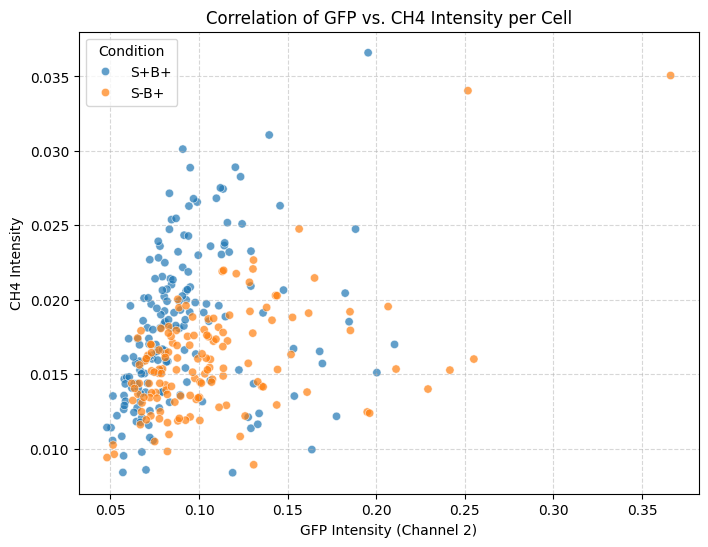

In [84]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_combined,
    x='mean_gfp',
    y='mean_s647',
    hue='Condition',  # Use the new column to distinguish colors
    alpha=0.7         # Set transparency for better visibility of overlapping points
)

plt.xlabel("GFP Intensity (Channel 2)")
plt.ylabel("CH4 Intensity")
plt.title("Correlation of GFP vs. CH4 Intensity per Cell")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [8]:
# Save mask
#mask_path = save_folder / f"{all_files[i].stem}_mask.tif"
mask_path = "C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/cellpose" / f"mask.tif"
io.imsave(mask_path, masks[0])

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [15]:
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, ch1_img, masks, flows[0])
plt.tight_layout()
plt.show()

NameError: name 'ch1_img' is not defined

<Figure size 1200x500 with 0 Axes>